# Wetterstation Kloten

In [68]:
import numpy as np
import matplotlib.pyplot as plt

1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

In [69]:
#load csv file
weather = np.loadtxt('Zürich21-22-GruppeG.csv', skiprows=1, delimiter=';', dtype=str)

#select data for Kloten
klo_weather = [row for row in weather if row[0] == 'KLO'] #klo_weather is a list of lists or Numpy array???


- #stn: Stationnummer oder ID der Wetterstation
- time: Zeitpunkt der Messung im Format JJJJMMDDhhmm
- prestah0: Luftdruck auf Stationshöhe (in hPa)
- tre200h0: Lufttemperatur in 2m Höhe (in Grad Celsius)
- rre150h0: Niederschlagssumme (in mm) der letzten 6 Minuten
- su2000h0: Sonnenscheindauer in Minuten der letzten Stunde
- time_diff: Zeitdifferenz zur vorigen Messung in Minuten

In [74]:
from datetime import datetime
print("Anzahl Messungen:", len(klo_weather))


klo_weather_t = np.transpose(klo_weather)

#stn;time;prestah0;tre200h0;rre150h0;su2000h0;time_diff
#stn = klo_weather_t[0]
#time = klo_weather_t[1].astype.datetime
time = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in klo_weather_t[1]]
prestah0 = klo_weather_t[2].astype(float)
trew200h0 = klo_weather_t[3].astype(float)
rre150h0 = klo_weather_t[4].astype(float)
su2000h0 = klo_weather_t[5].astype(float)
time_diff = klo_weather_t[6].astype(float)

Anzahl Messungen: 7473


In [4]:
# Plots erstellen
""" plt.plot(time, prestah0)
plt.xlabel('Zeit')
plt.ylabel('Prestah0')
plt.show() """
""" plt.plot(time[200:204], trew200h0[200:204], "ro")
plt.xlabel('Zeit')
plt.ylabel('Luftdruck')
plt.legend()
plt.show() """



' plt.plot(time[200:204], trew200h0[200:204], "ro")\nplt.xlabel(\'Zeit\')\nplt.ylabel(\'Luftdruck\')\nplt.legend()\nplt.show() '

2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

[ 0.          0.51020408  1.02040816  1.53061224  2.04081633  2.55102041
  3.06122449  3.57142857  4.08163265  4.59183673  5.10204082  5.6122449
  6.12244898  6.63265306  7.14285714  7.65306122  8.16326531  8.67346939
  9.18367347  9.69387755 10.20408163 10.71428571 11.2244898  11.73469388
 12.24489796 12.75510204 13.26530612 13.7755102  14.28571429 14.79591837
 15.30612245 15.81632653 16.32653061 16.83673469 17.34693878 17.85714286
 18.36734694 18.87755102 19.3877551  19.89795918 20.40816327 20.91836735
 21.42857143 21.93877551 22.44897959 22.95918367 23.46938776 23.97959184
 24.48979592 25.        ]
[955.7        955.45645042 955.18951949 954.95067823 954.79139168
 954.74850088 954.81277541 954.97525308 955.25304267 955.6445582
 956.09022887 956.53727234 956.96794959 957.36926314 957.72821553
 958.03180931 958.26673925 958.39932903 958.36453565 958.16201619
 957.88800708 957.60365036 957.31460652 957.02282812 956.73026775
 956.43887797 956.15103115 955.87790548 955.63903726 955.45429

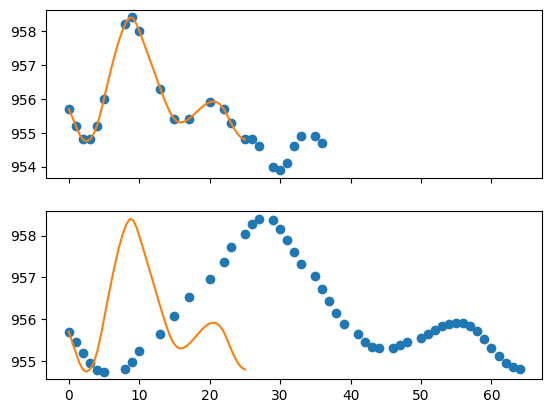

In [95]:
from scipy import interpolate

max = np.max(time_diff)
#0, 7473, 2*7473
t = np.linspace(0, 25, 50)


f_cubic = interpolate.interp1d(time_diff[:25], prestah0[:25], kind='cubic')

press_inter = f_cubic(t)

print(t)
print(press_inter)
print(len(time_diff[:25]))
print(time_diff[:25])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(time_diff[:25], prestah0[:25], 'o', t, f_cubic(t), '-')

ax2.plot(time_diff[:50], press_inter, 'o', t, f_cubic(t), '-')

plt.show()

3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

In [49]:
print(time[0:5])

tage = time.astype('datetime64[D]')
uhrzeiten = time.astype('datetime64[h]') - tage.astype('datetime64[h]')

""" print(uhrzeiten[:24])
print(tage[12:20]) """


#initialize 
luftdruck = np.array([]).astype(float)
mean_luftdruck = np.array([]).astype(float)
day_before = tage[0]

""" for tag in tage[:20]:
    if day_before == tag:
        luftdruck = np.append(luftdruck, trew200h0)
    else:
        mean_luftdruck = np.append(np.mean(luftdruck)) 
        #clear lufdruck
        luftdruck = np.array([]) """
        
print(tage[10:20])
print(trew200h0[10:20])
for i in range(len(tage[10:20])):
    if day_before == tage[i]:
        luftdruck = np.append(luftdruck, trew200h0[i+10].astype(float))  #+10 because of the first 10 rows
    else:
        mean_luftdruck = np.append(mean_luftdruck, np.mean(luftdruck)) 
        #clear lufdruck
        luftdruck = np.array([])
        day_before = tage[i+10]

mean_luftdruck = np.append(mean_luftdruck, np.mean(luftdruck)) 
        
print(mean_luftdruck)
        

['2021-11-01 00:00:00' '2021-11-01 01:00:00' '2021-11-01 02:00:00'
 '2021-11-01 03:00:00' '2021-11-01 04:00:00']
['2021-11-01' '2021-11-01' '2021-11-01' '2021-11-01' '2021-11-01'
 '2021-11-02' '2021-11-02' '2021-11-02' '2021-11-02' '2021-11-02']
['11.2' '9.8' '7.2' '6.7' '6.4' '7.9' '7.2' '5.4' '4.6' '5.0']
[7.14]
